# Loan Data
This dataset consists of more than 9,500 loans with information on the loan structure, the borrower, and whether the loan was pain back in full. This data was extracted from LendingClub.com, which is a company that connects borrowers with investors. 



In [2]:
import matplotlib.pyplot as plot
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


In [3]:
loan_df=pd.read_csv("loan_data.csv")

In [4]:
loan_df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


## Data dictionary

|    | Variable          | Explanation                                                                                                             |
|---:|:------------------|:------------------------------------------------------------------------------------------------------------------------|
|  0 | credit_policy     | 1 if the customer meets the credit underwriting criteria; 0 otherwise.                                                  |
|  1 | purpose           | The purpose of the loan.                                                                                                |
|  2 | int_rate          | The interest rate of the loan (more risky borrowers are assigned higher interest rates).                                |
|  3 | installment       | The monthly installments owed by the borrower if the loan is funded.                                                    |
|  4 | log_annual_inc    | The natural log of the self-reported annual income of the borrower.                                                     |
|  5 | dti               | The debt-to-income ratio of the borrower (amount of debt divided by annual income).                                     |
|  6 | fico              | The FICO credit score of the borrower.                                                                                  |
|  7 | days_with_cr_line | The number of days the borrower has had a credit line.                                                                  |
|  8 | revol_bal         | The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).                           |
|  9 | revol_util        | The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available). |
| 10 | inq_last_6mths    | The borrower's number of inquiries by creditors in the last 6 months.                                                   |
| 11 | delinq_2yrs       | The number of times the borrower had been 30+ days past due on a payment in the past 2 years.                           |
| 12 | pub_rec           | The borrower's number of derogatory public records.                                                                     |
| 13 | not_fully_paid    | 1 if the loan is not fully paid; 0 otherwise.   

[Source](https://www.kaggle.com/itssuru/loan-data) of dataset.

Lets get more information on this dataset using .info()

In [9]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


 Lets check out the numbers of rows and columns with .shape

In [10]:
loan_df.shape

(9578, 14)

There are 9578 rows and 14 columns

Lets check for missing values in the dataset

In [11]:
loan_df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

It appears that there are no missing data in the dataset

Text(0, 0.5, 'Borrowers')

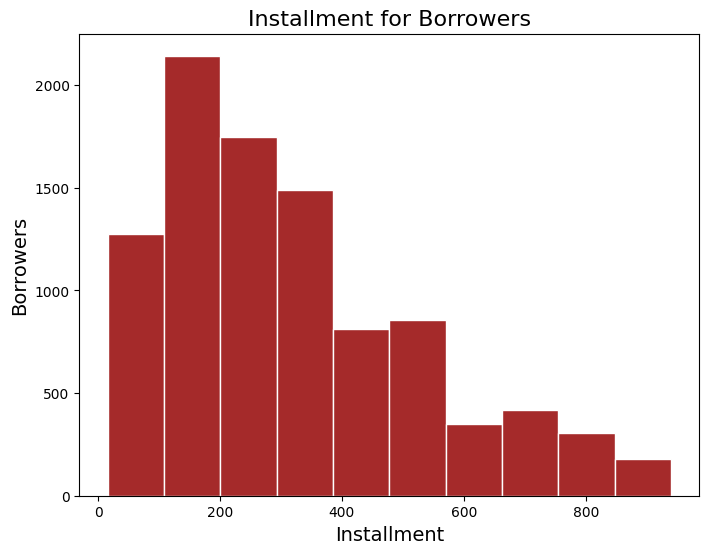

In [12]:
#Visualize installment
fig,ax = plot.subplots(figsize = (8,6))
plot.hist(loan_df['installment'],edgecolor='white', color='brown')
plot.title("Installment for Borrowers", fontsize=16)
plot.xlabel("Installment", fontsize=14)
plot.ylabel('Borrowers', fontsize=14)

Text(0, 0.5, 'Borrowers')

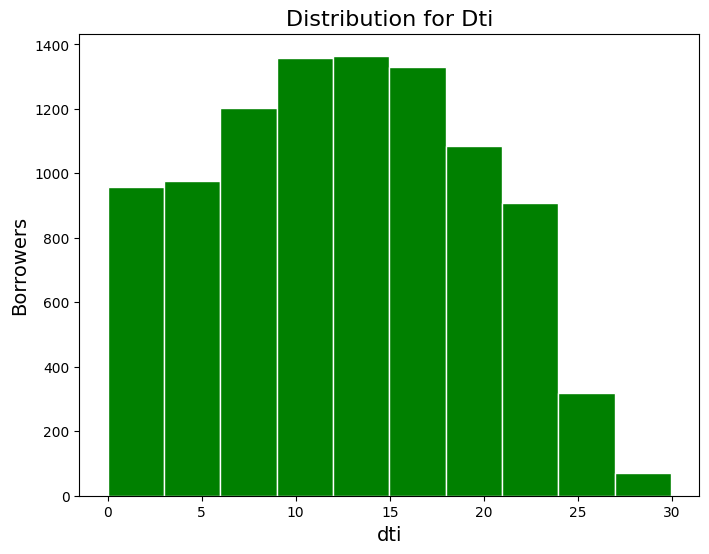

In [14]:
#Visualize dti
fig,ax = plot.subplots(figsize = (8,6))
plot.hist(loan_df['dti'],edgecolor='white', color='green')
plot.title("Distribution for Dti", fontsize=16)
plot.xlabel("dti", fontsize=14)
plot.ylabel('Borrowers', fontsize=14)

Text(0, 0.5, 'Borrowers')

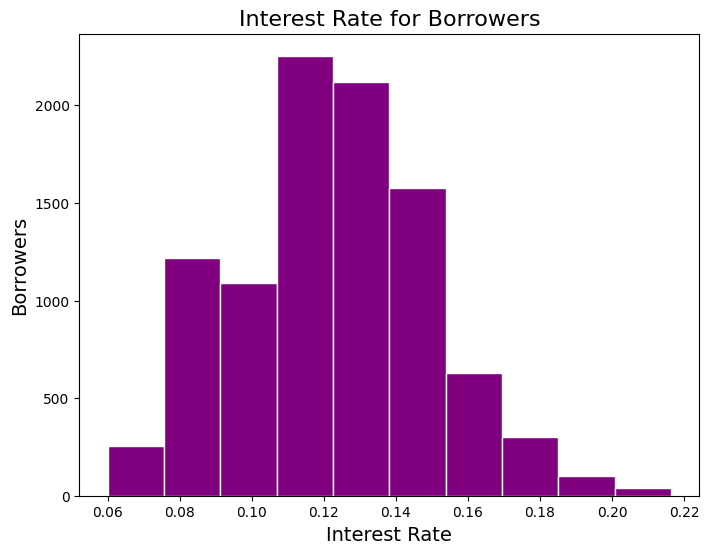

In [15]:
#Visualize the interest rate
fig,ax = plot.subplots(figsize = (8,6))
plot.hist(loan_df['int.rate'],edgecolor='white', color='purple')
plot.title("Interest Rate for Borrowers", fontsize=16)
plot.xlabel("Interest Rate", fontsize=14)
plot.ylabel('Borrowers', fontsize=14)

More than 2000 borrowers got the highest interest rate between 0.12-0.14

Text(0, 0.5, 'Borrowers')

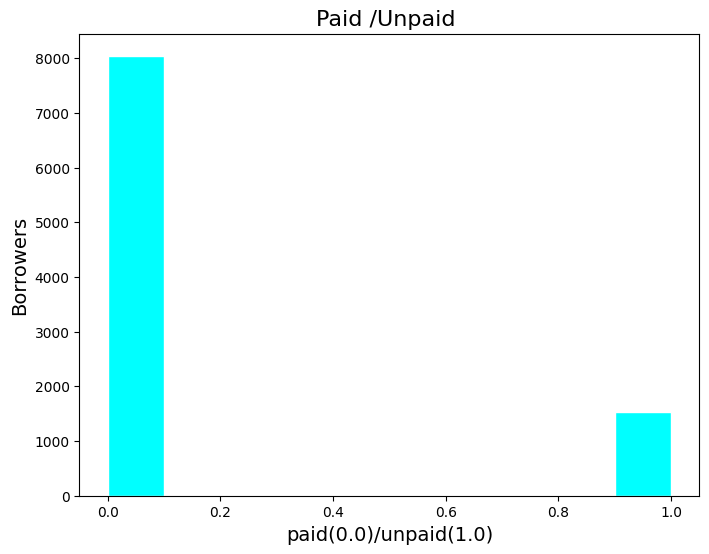

In [17]:
#Visualize notfullypaid column
fig,ax = plot.subplots(figsize = (8,6))
plot.hist(loan_df['not.fully.paid'],edgecolor='white', color='cyan')
plot.title("Paid /Unpaid ", fontsize=16)
plot.xlabel("paid(0.0)/unpaid(1.0)", fontsize=14)
plot.ylabel('Borrowers', fontsize=14)

The histogram above shows that almost 90% of borrowers are able to pay back their loan while 10% are yet to pay 

Lets visualize the predominant purpose loans were collected

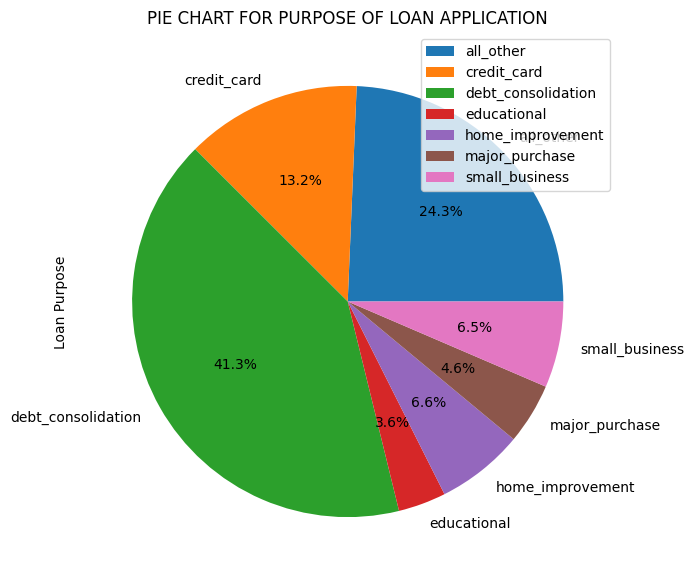

In [18]:
loan_df.groupby('purpose').size().plot(kind='pie', subplots=True, figsize=(7, 7),autopct='%1.1f%%')
plot.title("PIE CHART FOR PURPOSE OF LOAN APPLICATION")
plot.ylabel('Loan Purpose')
plot.legend()
plot.show()


41.3% of borrowers borrowed loan for dept consolidation while 24.3% borrowed for other reasons and 13.2% borrowed for credit card

Lets seperate some columns from the datasets in order to check for distribution of each column in the dataset

In [19]:
loan_cols = loan_df[['int.rate','installment','log.annual.inc','dti','fico','days.with.cr.line','revol.bal','revol.util','inq.last.6mths']]

In [20]:
loan_cols

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths
0,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0
1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0
2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1
3,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1
4,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0
...,...,...,...,...,...,...,...,...,...
9573,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2
9574,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5
9575,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8
9576,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5


Lets visualize the distributions of these columns 

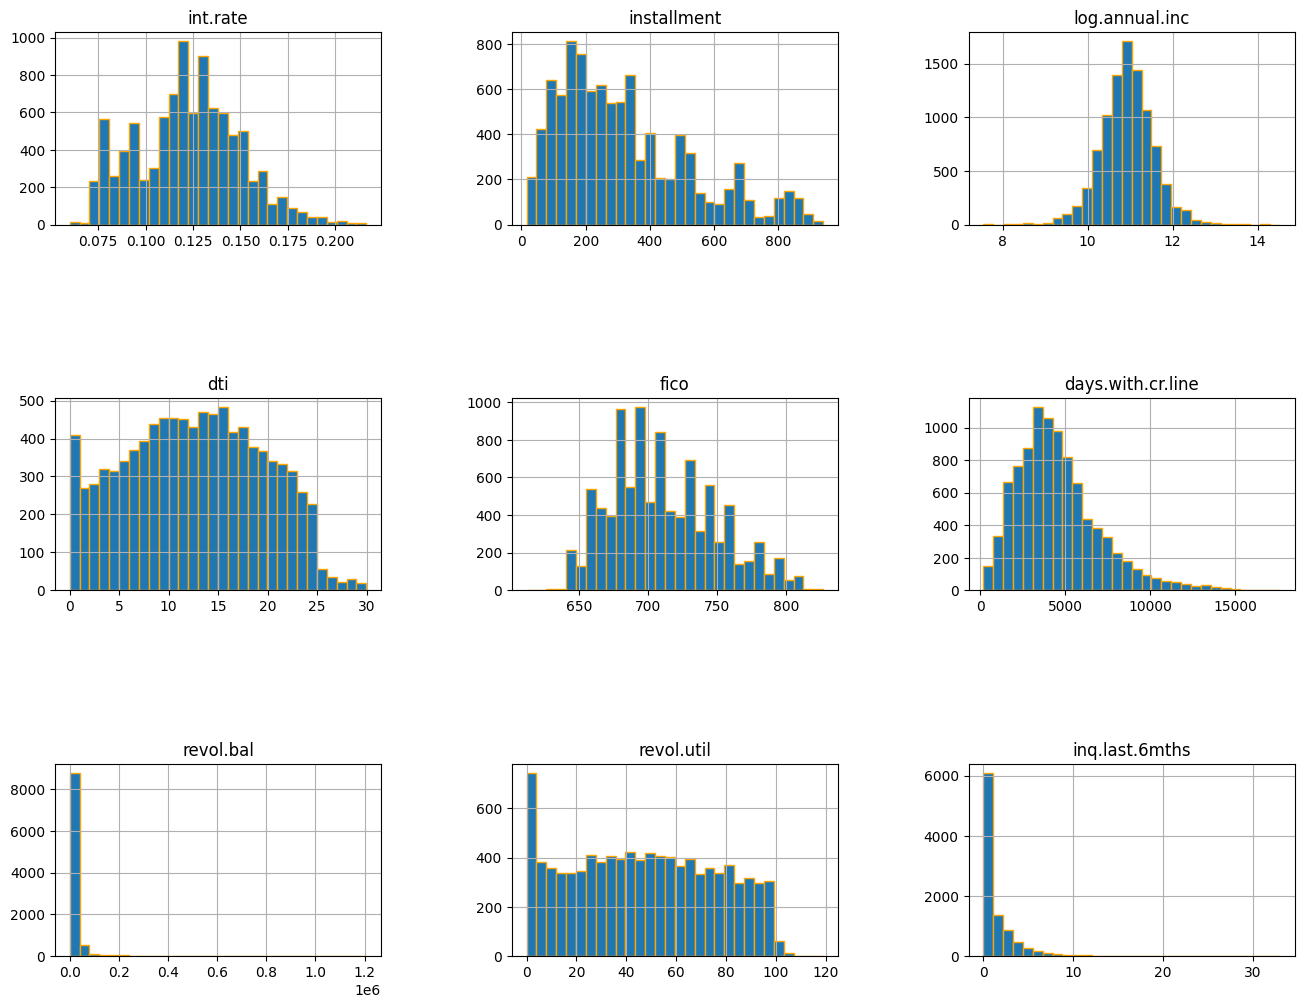

In [21]:
loan_cols.hist(figsize=(16, 12), bins=30, edgecolor="orange")
plot.subplots_adjust(hspace=0.9, wspace=0.4)

Evenly Distributed features tend to have a bell shaped curved. Some of the features or columns described by the histogram above are not well distributed this could lead to the presence of outliers.

Lets check for outliers in the features using the seaborn library with boxplot

Text(0.5, 1.0, 'Boxplot')

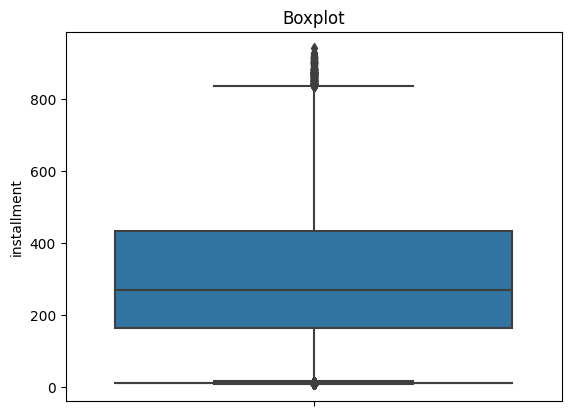

In [29]:

sns.boxplot(y=loan_df['log.annual.inc'])
plot.title('Boxplot')
sns.boxplot(y=loan_df['installment'])
plot.title('Boxplot')

Text(0.5, 1.0, 'Boxplot')

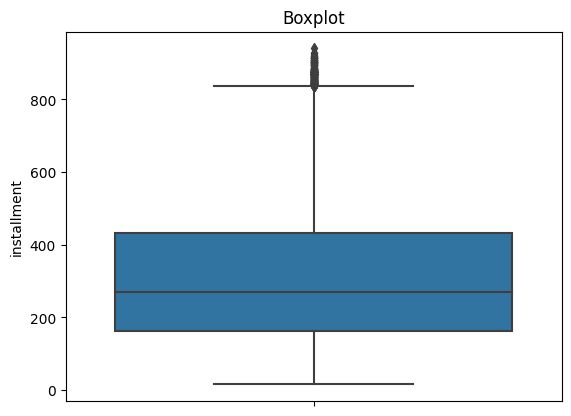

In [22]:
sns.boxplot(y=loan_df['installment'])
plot.title('Boxplot')

Text(0.5, 1.0, 'Boxplot')

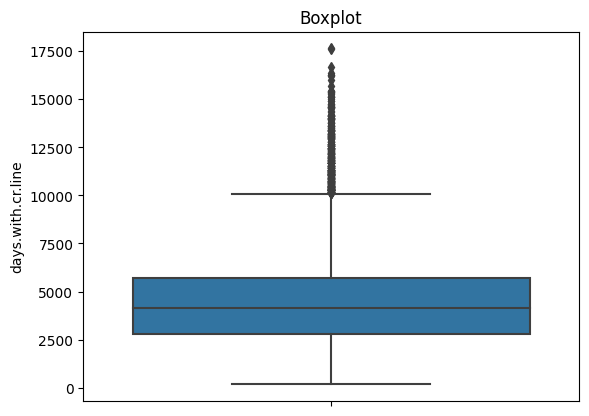

In [31]:
sns.boxplot(y=loan_df['days.with.cr.line'])
plot.title('Boxplot')

Text(0.5, 1.0, 'Boxplot')

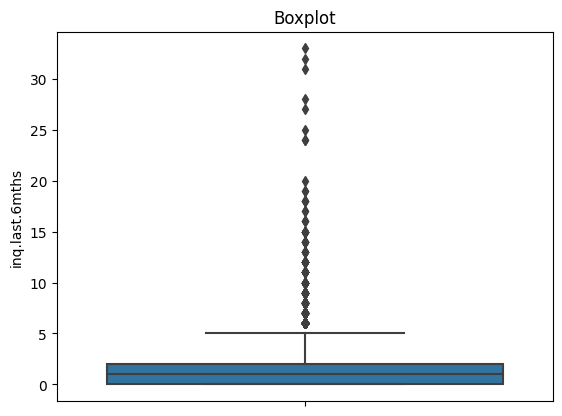

In [32]:
sns.boxplot(y=loan_df['inq.last.6mths'])
plot.title('Boxplot')

Text(0.5, 1.0, 'Boxplot')

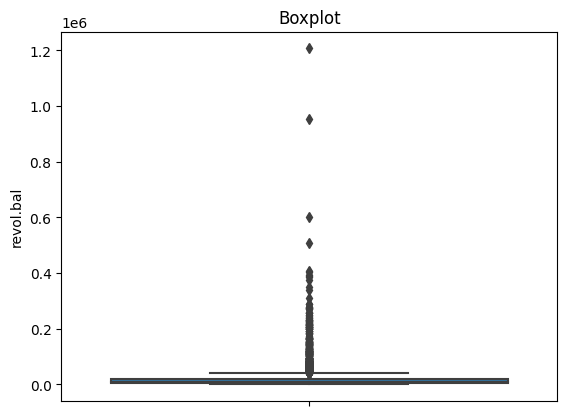

In [33]:
sns.boxplot(y=loan_df['revol.bal'])
plot.title('Boxplot')

The black dots displaying at the top and bottom of the plot above indicates the presence of outliers

In [23]:
#creating a function to find the boundaries of a variable distribution, 
#using the inter-quartile range proximity rule to remove outliers:

def find_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)
    return upper_boundary, lower_boundary

In [24]:
#removing outliers across multiple variables
installment_upper_limit, installment_lower_limit = find_boundaries(loan_df, 'installment', 1.5)
inq_last_6mths_upper_limit, inq_last_6mths_lower_limit = find_boundaries(loan_df, 'inq.last.6mths', 1.5)
log_annual_inc_upper_limit, log_annual_inc_lower_limit = find_boundaries(loan_df, 'log.annual.inc', 1.5)
days_with_cr_line_upper_limit, days_with_cr_line_lower_limit = find_boundaries(loan_df, 'days.with.cr.line', 1.5)
revol_bal_upper_limit, revol_bal_lower_limit = find_boundaries(loan_df, 'revol.bal', 1.5)

In [25]:
outliers_installment = np.where(loan_df['installment'] > installment_upper_limit, True,
              np.where(loan_df['installment'] < installment_lower_limit, True, False))

outliers_log_annual_inc = np.where(loan_df['log.annual.inc'] > log_annual_inc_upper_limit, True,
                 np.where(loan_df['log.annual.inc'] < log_annual_inc_lower_limit, True, 
                 False))


outliers_days_with_cr_line = np.where(loan_df['days.with.cr.line'] > days_with_cr_line_upper_limit, True,
                 np.where(loan_df['days.with.cr.line'] < days_with_cr_line_lower_limit, True, 
                 False))



outliers_inq_last_6mths = np.where(loan_df['inq.last.6mths'] > inq_last_6mths_upper_limit, True,
                 np.where(loan_df['inq.last.6mths'] < inq_last_6mths_lower_limit, True, 
                 False))



outliers_revol_bal = np.where(loan_df['revol.bal'] > revol_bal_upper_limit, True,
                np.where(loan_df['revol.bal'] < revol_bal_lower_limit, True, 
                False))

In [27]:
#Finally, let's remove the observations with outliers in any of the variables:
loan_df_trimmed = loan_df.loc[~(outliers_installment + outliers_log_annual_inc + outliers_days_with_cr_line + outliers_inq_last_6mths + outliers_revol_bal)]

Text(0.5, 1.0, 'Boxplot')

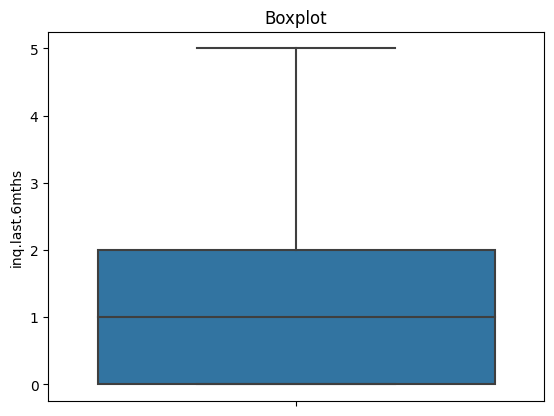

In [28]:
#Checking if the outliers have been removed or reduced
sns.boxplot(y=loan_df_trimmed['inq.last.6mths'])
plot.title('Boxplot')

Its time to split our data into train and test 

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
   loan_df_trimmed.drop('not.fully.paid', axis=1), loan_df_trimmed['not.fully.paid' ], test_size=0.3, 
    random_state=0)

Since the aim for this task is to predict whether a borrower would pay his/her loan or not, then the target feature would be the not.fully.paid column

In [30]:
#lets confirm that the 
X_train.shape


(5454, 13)

In [32]:
X_train.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec'],
      dtype='object')

In [42]:
X_test.shape

(2338, 13)

Lets encode the purpose column because it contains categorical variables

In [33]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
X_train['purpose']= label_encoder.fit_transform(X_train['purpose'])
X_test['purpose']= label_encoder.fit_transform(X_test['purpose']) 


In [34]:
#lets check if the purpose variable has been encoded

X_train['purpose']

3919    5
1371    5
6606    0
1054    4
6495    2
       ..
5628    2
3718    1
1892    3
2972    2
3118    6
Name: purpose, Length: 5454, dtype: int64

In [35]:
X_test.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
5740,1,2,0.1218,666.00,11.082143,15.10,722,5760.000000,9263,48.0,1,0,1
7828,0,2,0.1533,364.82,10.203592,13.02,647,1109.000000,8742,87.4,0,0,0
2969,1,4,0.1379,340.76,10.491274,12.30,732,8130.958333,6729,97.5,1,0,0
6757,1,2,0.1148,296.72,10.126631,16.70,722,3390.041667,1557,51.9,0,0,0
4368,1,0,0.0859,189.67,10.896739,11.98,742,3929.958333,10275,43.9,0,0,0


In [36]:
#lets check the unique categories in our test data
y_train.unique()

array([0, 1])

Its important to standardize all numerical varaiables to enable a accurate ML prediction

In [37]:

scaler = StandardScaler() 
scaler.fit(X_train)

StandardScaler()

We have fit the training data above. its time to transform it on the test data

In [38]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
X_train_scaled 

array([[ 0.40575615,  1.85904103, -1.57825498, ...,  0.59329808,
        -0.31885789, -0.2311967 ],
       [ 0.40575615,  1.85904103, -1.16253097, ..., -0.15177393,
        -0.31885789, -0.2311967 ],
       [ 0.40575615, -1.15606834,  1.12589373, ..., -0.89684593,
         1.59639643, -0.2311967 ],
       ...,
       [ 0.40575615,  0.65299728,  0.54698833, ...,  1.33837008,
        -0.31885789, -0.2311967 ],
       [ 0.40575615,  0.04997541,  0.42654493, ...,  0.59329808,
        -0.31885789, -0.2311967 ],
       [ 0.40575615,  2.46206291, -0.18732791, ..., -0.89684593,
         1.59639643, -0.2311967 ]])

When variables are scaled the values are converted to a numpy array, so we need to convert them back to a dataframe

In [40]:

X_train_scaled= pd.DataFrame(X_train_scaled, columns =['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc','dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec'])
X_test_scaled= pd.DataFrame(X_test_scaled, columns =['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc','dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec'])

In [51]:
X_train_scaled.shape

(5454, 13)

In [41]:
X_test_scaled.shape

(2338, 13)

In [42]:
X_train_scaled.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
0,0.405756,1.859041,-1.578255,-0.949575,0.520164,0.267908,1.619172,-0.918121,-1.061274,-1.503131,0.593298,-0.318858,-0.231197
1,0.405756,1.859041,-1.162531,-0.380375,0.212320,-0.445441,0.819724,2.626416,-0.743997,-1.274028,-0.151774,-0.318858,-0.231197
2,0.405756,-1.156068,1.125894,2.825781,1.682359,-0.607566,-0.112964,0.527772,-1.084736,-1.565613,-0.896846,1.596396,-0.231197
3,0.405756,1.256019,-1.333483,-1.359224,0.278036,0.776390,0.553242,0.448649,1.521475,0.301921,-0.151774,-0.318858,-0.231197
4,0.405756,0.049975,1.125894,2.920712,2.607117,-1.794025,-0.112964,0.523766,-1.084736,-1.565613,-0.896846,1.596396,-0.231197


From above the above, we can see that the values are scaled and converted to a dataframe

In [44]:
#lets reset the the index
reset_y=y_train.reset_index()

In [45]:
reset_y.head()

,index,not.fully.paid
0,3919,0
1,1371,0
2,6606,0
3,1054,0
4,6495,0


In [46]:
y_train=reset_y.drop(['index'],axis=1)


In [47]:
y_train.shape

(5454, 1)

In [48]:
y_train.value_counts()

not.fully.paid
0                 4665
1                  789
dtype: int64

The above shows that the number of those who paid and those who did not pay is unbalanced. The number of borrowers who paid is much higher than those who default. This might lead to bias

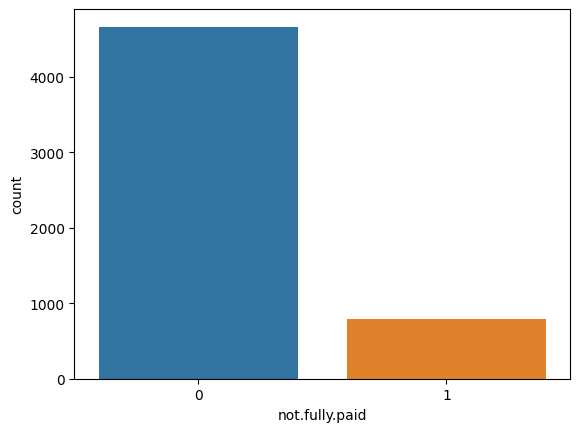

In [49]:
#lets visualize the column
sns.countplot(x='not.fully.paid',data=y_train)
plot.show()

Balancing target column

In [50]:
#Lets Concatenate y_train and X_train to apply balancing, we would seperate them later again.
loan_bal = pd.concat([y_train, X_train_scaled], axis=1)

In [51]:
loan_bal.tail(10)

,not.fully.paid,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
5444,0,0.405756,-0.553046,0.045788,0.553585,-0.506335,1.103587,-0.112964,-0.332371,-0.050463,0.919804,0.593298,-0.318858,-0.231197
5445,0,0.405756,-1.156068,-0.649675,-1.280846,-1.662497,-0.625252,-0.512688,-1.308621,-0.938752,-1.260143,0.593298,1.596396,-0.231197
5446,0,-2.464534,-0.553046,1.405633,-1.406360,-0.506335,1.209705,-1.312136,-1.368677,-0.949722,1.141965,2.083442,-0.318858,-0.231197
5447,0,0.405756,-1.156068,-0.358280,-0.198242,0.278036,0.169159,0.553242,-0.662773,-0.692946,-1.124764,1.338370,-0.318858,-0.231197
5448,0,0.405756,-1.156068,1.125894,-0.497284,-0.074664,1.062319,-0.246206,-0.662794,0.441474,1.853572,-0.896846,-0.318858,-0.231197
5449,0,0.405756,0.049975,-0.358280,0.520973,-0.506335,0.639321,1.086207,0.692482,0.272027,0.229025,0.593298,-0.318858,-0.231197
5450,0,0.405756,-0.553046,2.388607,0.112256,0.675881,1.396886,-1.045653,0.253399,1.545589,0.992701,0.593298,-0.318858,-0.231197
5451,0,0.405756,0.652997,0.546988,1.152327,0.372420,0.082201,0.020277,1.191100,0.867804,1.773733,1.338370,-0.318858,-0.231197
5452,0,0.405756,0.049975,0.426545,1.139830,-0.999423,0.116100,1.219448,1.139534,-0.577701,0.846908,0.593298,-0.318858,-0.231197
5453,0,0.405756,2.462063,-0.187328,0.534785,-0.506335,-0.191937,0.153518,1.530034,0.787860,0.499783,-0.896846,1.596396,-0.231197


In [52]:
loan_bal.shape

(5454, 14)

Lets balance or resample the not.fully.paid column to make it fully balance

<AxesSubplot:xlabel='not.fully.paid', ylabel='count'>

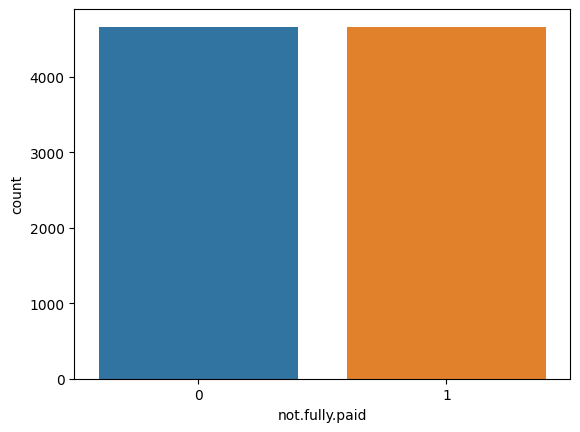

In [53]:
from sklearn.utils import resample
loan_majority = loan_bal[loan_bal['not.fully.paid']==0]
loan_minority = loan_bal[loan_bal['not.fully.paid']==1]

# Upsample minority class == 1
loan_minority_upsampled = resample(loan_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=4665,  # to match majority class
                                 random_state=123) 

# Combine majority class with upsampled minority class
loan_upsampled = pd.concat([loan_majority, loan_minority_upsampled])
sns.countplot(x= 'not.fully.paid', data=loan_upsampled) 

In [54]:
loan_upsampled.shape

(9330, 14)

Text(0.5, 1.0, 'Correlation between Different Features')

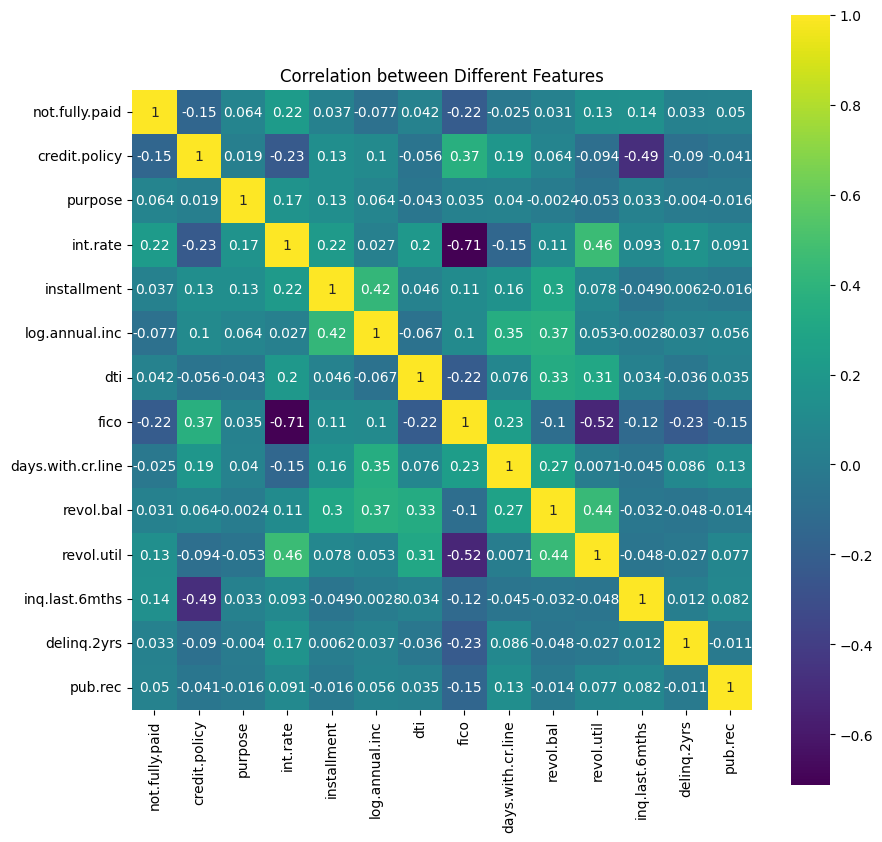

In [55]:
#Visual Correlation
correlation = loan_upsampled.corr()
plot.figure(figsize=(10, 10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

plot.title('Correlation between Different Features')

In [56]:
# Final training features
X_train_new = loan_upsampled.drop(["not.fully.paid"], axis = 1)
#X_train_new=X_train_new.drop(['Index'],axis=1)
X_train_new.head(10)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
0,0.405756,1.859041,-1.578255,-0.949575,0.520164,0.267908,1.619172,-0.918121,-1.061274,-1.503131,0.593298,-0.318858,-0.231197
1,0.405756,1.859041,-1.162531,-0.380375,0.212320,-0.445441,0.819724,2.626416,-0.743997,-1.274028,-0.151774,-0.318858,-0.231197
2,0.405756,-1.156068,1.125894,2.825781,1.682359,-0.607566,-0.112964,0.527772,-1.084736,-1.565613,-0.896846,1.596396,-0.231197
3,0.405756,1.256019,-1.333483,-1.359224,0.278036,0.776390,0.553242,0.448649,1.521475,0.301921,-0.151774,-0.318858,-0.231197
4,0.405756,0.049975,1.125894,2.920712,2.607117,-1.794025,-0.112964,0.523766,-1.084736,-1.565613,-0.896846,1.596396,-0.231197
5,-2.464534,1.859041,0.449857,-0.710275,0.834556,-0.076976,-0.645929,-0.112089,-0.892697,-0.937317,2.083442,1.596396,-0.231197
6,0.405756,0.049975,-0.401018,-0.290213,1.360611,-0.181620,-0.512688,1.442401,2.194915,0.534495,0.593298,-0.318858,-0.231197
8,-2.464534,2.462063,1.393977,1.239804,0.834556,0.721857,0.686483,0.493728,-0.165817,0.097117,2.828514,-0.318858,-0.231197
9,0.405756,-0.553046,0.088526,-0.631130,-0.820727,1.206758,-0.645929,-1.383696,-0.674807,-0.760283,-0.151774,-0.318858,-0.231197
10,0.405756,0.049975,1.285190,0.273342,-0.506335,1.744717,-1.312136,-1.224492,0.322644,0.871207,-0.151774,-0.318858,-0.231197


In [57]:
y_train_new= loan_upsampled['not.fully.paid']
y_train_new.tail(10)

2857    1
2480    1
668     1
258     1
4593    1
4098    1
5373    1
1353    1
1768    1
3568    1
Name: not.fully.paid, dtype: int64

In [58]:
y_test.head(10)

5740    0
7828    0
2969    1
6757    0
4368    0
239     0
3055    0
9352    0
5850    0
1174    1
Name: not.fully.paid, dtype: int64

Creating machine learning for pedicting using LogisticRegression

In [59]:
#from sklearn import tree, metrics, model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix




In [61]:

lgr=LogisticRegression()


In [62]:
# train the data 
lgr.fit(X_train_new, y_train_new)

LogisticRegression()

In [64]:
#Lets use our trained data to predict the test data
y_pred=lgr.predict(X_test_scaled)
y_pred

array([1, 1, 1, ..., 1, 0, 1])

In [65]:
#Calculate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy*100))

Accuracy: 60.01


In [66]:
#Create a confusion matrix
matrix= confusion_matrix(y_test,y_pred, labels=[0,1])
matrix

array([[1211,  803],
       [ 132,  192]])

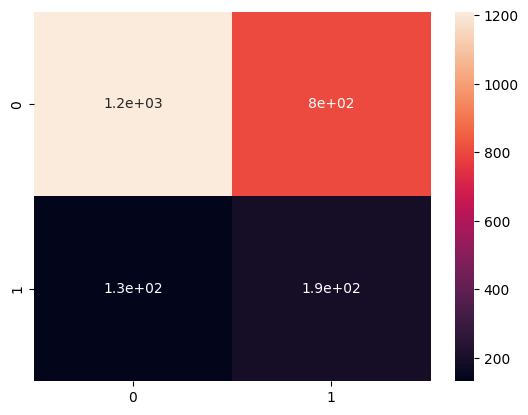

In [67]:
#Visualize the confusion matrix
sns.heatmap(matrix, annot=True)
plot.show()